- This data represents the results of a large product testing study. 

- For each product_code you are given a number of product attributes (fixed for the code) as well as a number of measurement values for each individual product, representing various lab testing methods. 

- Each product is used in a simulated real-world environment experiment, and absorbs a certain amount of fluid (loading) to see whether or not it fails.

- Your task is to use the data to predict individual product failures of new codes with their individual lab test results.



Import libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
sns.set_theme()
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(df.shape)
df.head()

(26570, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [6]:
#Check dtypes
df.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

Check class balance

In [14]:
df.failure.value_counts(normalize=True) #stratify train test split when there is class imbalance

0    0.787392
1    0.212608
Name: failure, dtype: float64

Check product_code, attribute_0, and 1


In [7]:
df.product_code.value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

In [11]:
df.attribute_0.value_counts()

material_7    21320
material_5     5250
Name: attribute_0, dtype: int64

In [12]:
df.attribute_1.value_counts()

material_8    10865
material_5    10362
material_6     5343
Name: attribute_1, dtype: int64

Check missing values

In [17]:
pd.concat([df.isnull().sum().rename('missing values for train'),test.isnull().sum().rename('missing values for test') ],axis=1)

,missing values for train,missing values for test
id,0,0.0
product_code,0,0.0
loading,250,223.0
attribute_0,0,0.0
attribute_1,0,0.0
attribute_2,0,0.0
attribute_3,0,0.0
measurement_0,0,0.0
measurement_1,0,0.0
measurement_2,0,0.0


Study distributions of continuous data

In [28]:
float_cols = [f for f in df.columns if df[f].dtype == float]
float_cols[0]

'loading'

In [38]:
ma = max(df[float_cols[0]].max(),test[float_cols[0]].max())
mi = min(df[float_cols[0]].min(),test[float_cols[0]].min())
bins = np.linspace(mi,ma,50)


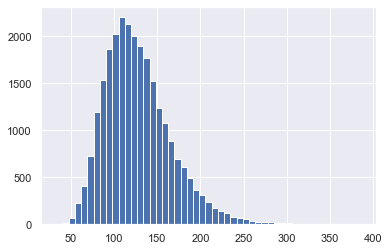

In [43]:
plt.hist(df[float_cols[0]],bins=bins)
plt.show()

In [56]:
total,_= np.histogram(df[float_cols[0]],bins=bins)
failures,_=np.histogram(df[float_cols[0]][df.failure==1],bins=bins)

/var/folders/ml/dhg91nmd1bs970g0q3ypf5l40000gn/T/ipykernel_58938/2605522518.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter((bins[1:]+bins[:-1])/2,failures/total,color='m',s=50)


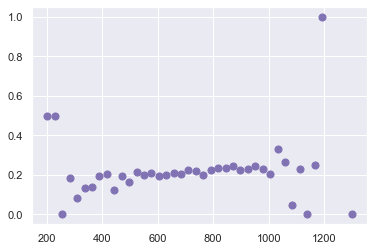

In [98]:
plt.tight_layout(w_pad=)

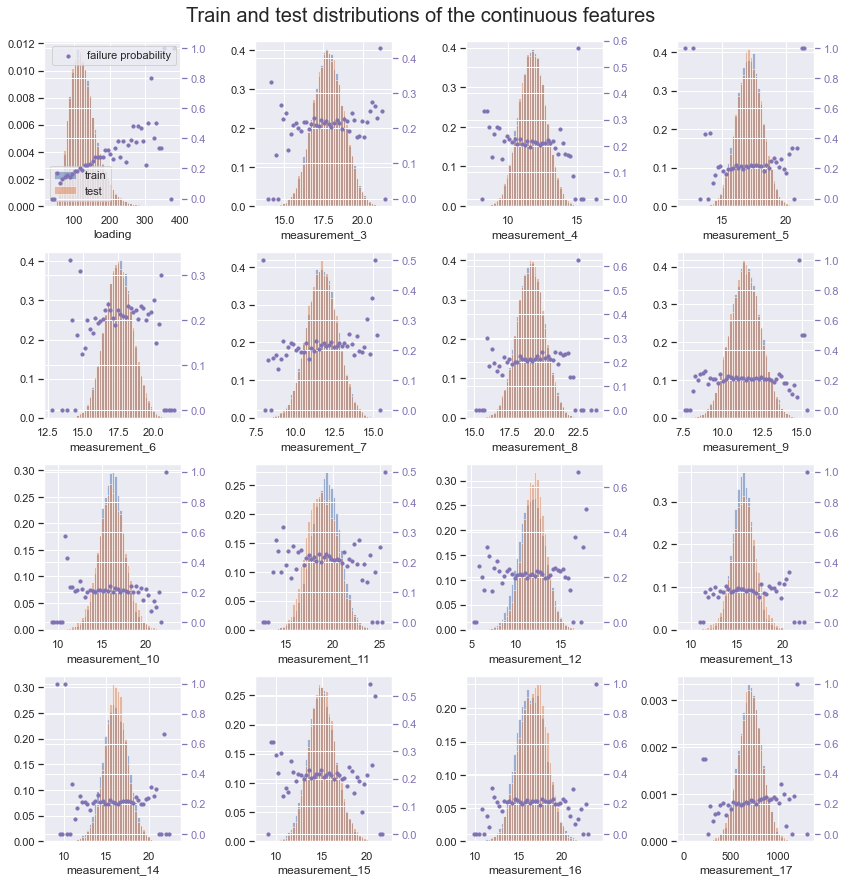

In [101]:
_, axs = plt.subplots(4, 4, figsize=(12,12))
for f,ax in zip(float_cols,axs.ravel()):
    
    #get min and max values for each category and create bins for each 
    mi = min(df[f].min(),test[f].min())
    ma = max(df[f].max(),test[f].max())
    bins = np.linspace(mi,ma,50)
    
    #plot histsograms
    ax.hist(df[f], bins=bins, alpha=0.5, density=True, label='train')
    ax.hist(test[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)
    if ax == axs[0, 0]: ax.legend(loc='lower left')
    
            
    ax2 = ax.twinx()
    
    #get values from histogram in total and failures, _ is border values
    total, _ = np.histogram(df[f], bins=bins)
    failures, _ = np.histogram(df[f][df.failure == 1], bins=bins)
    with warnings.catch_warnings(): # ignore divide by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
                    color='m', s=10, label='failure probability')
    # ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax == axs[0, 0]: ax2.legend(loc='upper right')
plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()
    